In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [4]:
th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain.head(10))


   Energy           a,n          S.F.         Total
0    10.0  6.375000e-16  1.576000e-19  6.376000e-16
1     9.9  7.031000e-16  1.779000e-19  7.033000e-16
2     9.8  7.722000e-16  2.019000e-19  7.724000e-16
3     9.7  8.434000e-16  2.289000e-19  8.436000e-16
4     9.6  9.169000e-16  2.575000e-19  9.172000e-16
5     9.5  9.935000e-16  2.922000e-19  9.938000e-16
6     9.4  1.110000e-15  3.291000e-19  1.110000e-15
7     9.2  1.814000e-15  4.207000e-19  1.814000e-15
8     9.1  2.250000e-15  4.753000e-19  2.250000e-15
9     9.0  2.703000e-15  5.364000e-19  2.703000e-15


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_20123/504622165.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_chain = pd.read_csv("data/raw_sources_IO/Th232_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [5]:
th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (th232_hang.head(10))

   Energy         Total
0  0.0161  1.612900e-09
1  0.0241  1.612800e-09
2  0.0241  1.601300e-09
3  0.0241  1.589800e-09
4  0.0241  1.578300e-09
5  0.0241  1.566800e-09
6  0.0241  1.555200e-09
7  0.0241  1.543700e-09
8  0.0241  1.532200e-09
9  0.0161  1.532200e-09


/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_20123/2598035741.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  th232_hang = pd.read_csv("data/raw_sources_IO/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \


In [7]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232hangEn = np.asarray(th232_hang['Energy'],dtype=float)
th232hangRn = np.asarray(th232_hang['Total'],dtype=float)



print(np.shape(th232chainEn))
print(np.shape(th232chainRn))

(87,)
(87,)


[6.376e-16 7.033e-16 7.724e-16 8.436e-16 9.172e-16 9.938e-16 1.110e-15
 1.814e-15 2.250e-15 2.703e-15 3.189e-15 3.748e-15 4.400e-15 5.046e-15
 6.683e-15 7.542e-15 8.487e-15 9.508e-15 1.056e-14 1.170e-14 1.289e-14
 1.552e-14 1.715e-14 1.921e-14 2.146e-14 2.421e-14 2.724e-14 3.026e-14
 3.959e-14 4.480e-14 5.027e-14 5.624e-14 6.273e-14 7.005e-14 7.746e-14
 9.458e-14 1.040e-13 1.141e-13 1.291e-13 1.460e-13 1.631e-13 1.808e-13
 2.388e-13 2.705e-13 3.061e-13 3.483e-13 3.992e-13 4.557e-13 5.165e-13
 6.617e-13 7.456e-13 8.418e-13 9.466e-13 1.040e-12 1.150e-12 1.262e-12
 1.522e-12 1.655e-12 1.787e-12 1.937e-12 2.079e-12 2.210e-12 2.366e-12
 2.759e-12 2.965e-12 3.191e-12 3.413e-12 3.657e-12 3.903e-12 4.164e-12
 4.681e-12 4.897e-12 5.097e-12 5.297e-12 5.461e-12 5.614e-12 5.731e-12
 5.817e-12 5.824e-12 5.857e-12 5.882e-12 5.850e-12 5.771e-12 5.632e-12
 4.788e-12 3.976e-12 2.921e-12]
0.09999999999999964


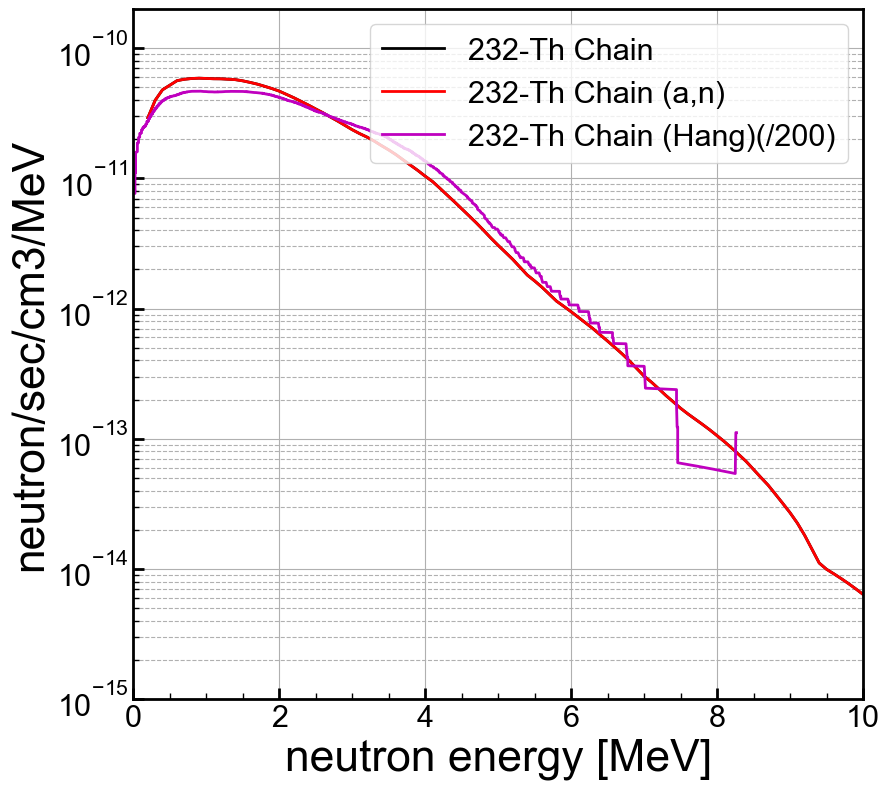

In [28]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])

print(width)



ax1.plot(th232chainEn, th232chainRn/width,color='k',linestyle='-',label="232-Th Chain")
ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232hangEn, th232hangRn/200,color='m',linestyle='-',label="232-Th Chain (Hang)(/200)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 2e-10


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [29]:
u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u238_chain.head(10))

u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u235_chain.head(10))

                                      Energy           a,n          S.F.  \
10.0 5.697000e-16 4.546000e-20  2.704000e-18  3.821000e-14  3.821000e-14   
9.9  8.896000e-16 5.084000e-20  2.972000e-18  4.270000e-14  4.270000e-14   
9.8  1.226000e-15 5.675000e-20  3.264000e-18  4.778000e-14  4.778000e-14   
9.7  1.573000e-15 6.345000e-20  3.588000e-18  5.348000e-14  5.348000e-14   
9.6  1.932000e-15 7.067000e-20  3.939000e-18  5.984000e-14  5.985000e-14   
9.5  2.305000e-15 7.889000e-20  4.326000e-18  6.682000e-14  6.683000e-14   
9.4  2.688000e-15 8.808000e-20  4.750000e-18  7.489000e-14  7.489000e-14   
9.2  3.490000e-15 1.095000e-19  5.722000e-18  9.350000e-14  9.351000e-14   
9.1  3.909000e-15 1.221000e-19  6.281000e-18  1.044000e-13  1.044000e-13   
9.0  4.339000e-15 1.360000e-19  6.889000e-18  1.167000e-13  1.167000e-13   

                                       Total  
10.0 5.697000e-16 4.546000e-20  3.878000e-14  
9.9  8.896000e-16 5.084000e-20  4.359000e-14  
9.8  1.226000e-15 5.67

/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_20123/1251044759.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u238_chain = pd.read_csv("data/raw_sources_IO/U238_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_20123/1251044759.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  u235_chain = pd.read_csv("data/raw_sources_IO/U235_summary_1ppb.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \


In [12]:
UAN_hang = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/Hang_S4_UAN.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (UAN_hang.head(10))

USF_hang = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/Hang_S4_USF.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (USF_hang.head(10))

   Energy         Total
0  0.0522  7.043000e-12
1  0.0596  7.043000e-12
2  0.0596  6.989200e-12
3  0.0596  6.935500e-12
4  0.0596  6.881700e-12
5  0.0596  6.828000e-12
6  0.0596  6.774200e-12
7  0.0596  6.720400e-12
8  0.0596  6.666700e-12
9  0.0596  6.612900e-12
   Energy         Total
0  0.0671  5.860200e-12
1  0.0746  5.860200e-12
2  0.0820  5.860200e-12
3  0.0746  5.806500e-12
4  0.0746  5.752700e-12
5  0.0746  5.698900e-12
6  0.0746  5.645200e-12
7  0.0671  5.645200e-12
8  0.0671  5.698900e-12
9  0.0671  5.752700e-12


In [13]:
u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_chain['S.F.'],dtype=float)

u235chainEn = np.asarray(u235_chain['Energy'],dtype=float)
u235chainRn = np.asarray(u235_chain['Total'],dtype=float)
u235chainANRn = np.asarray(u235_chain['a,n'],dtype=float)
u235chainSFRn = np.asarray(u235_chain['S.F.'],dtype=float)

uANhangEn = np.asarray(UAN_hang['Energy'],dtype=float)
uANhangRn = np.asarray(UAN_hang['Total'],dtype=float)

uSFhangEn = np.asarray(USF_hang['Energy'],dtype=float)
uSFhangRn = np.asarray(USF_hang['Total'],dtype=float)


print(np.shape(u238chainEn))
print(np.shape(u238chainRn))

(87,)
(87,)


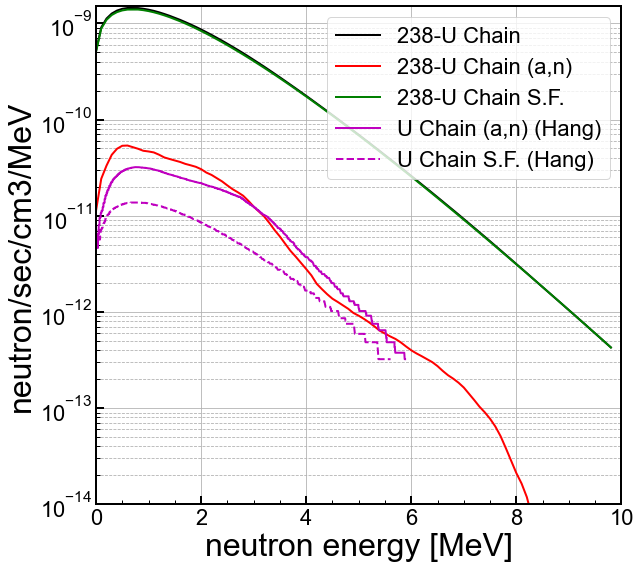

In [18]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.diff(u238chainEn)[0]



ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
ax1.plot(uANhangEn, uANhangRn,color='m',linestyle='-',label="U Chain (a,n) (Hang)")
ax1.plot(uSFhangEn, uSFhangRn,color='m',linestyle='--',label="U Chain S.F. (Hang)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1.5e-9


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

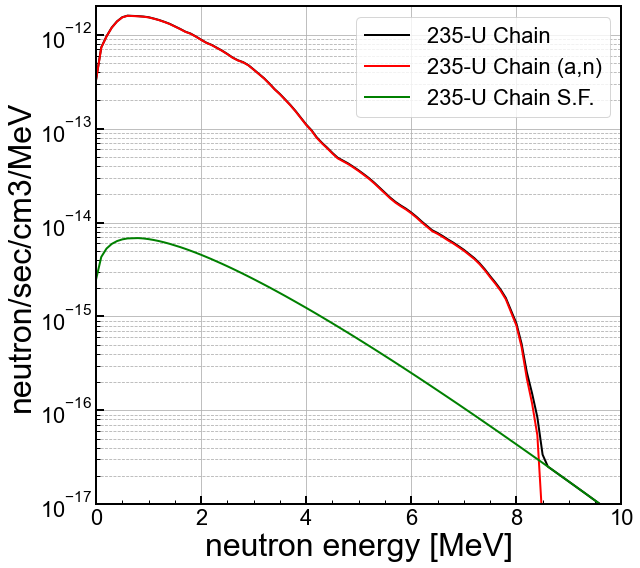

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.diff(u235chainEn)[0]



ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='-',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle='-',label="235-U Chain (a,n)")
ax1.plot(u235chainEn, u235chainSFRn/width,color='g',linestyle='-',label="235-U Chain S.F.")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-17
ymax = 2e-12


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()